<a href="https://colab.research.google.com/github/Nikhitha2018/phish/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python37\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [2]:
pip install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python37\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow-2.9.1-cp37-cp37m-win_amd64.whl (444.0 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.14.1-cp37-cp37m-win_amd64.whl (35 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


**IMPORT LIBRARIES**

In [8]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
import numpy as np
from sklearn import metrics

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

**LOADING THE DATASET**

In [32]:
import pandas as pd
data0=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [12]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
data = pd.read_csv("C:/Users/hp/desktop/project/urldata.csv")
#droping index column
data = data.drop(['Domain'],axis = 1)
# Splitting the dataset into dependant and independant fetature




**DROP THE DOMAIN NAME COLUMN**

In [14]:
data = data0.drop(['Domain'], axis = 1)

KeyError: "['Domain'] not found in axis"

In [15]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [35]:
data = data0.drop(['DNS_Record'],axis = 1 ).copy() 

In [16]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


In [37]:
data = data.drop(['Domain'], axis = 1)

 **LABELLING THE DATA AND SPLITTING THE DATA**

In [17]:
y = data['Label'].values
X = data.drop('Label',axis=1).values 

# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)


**RESHAPING THE DATA**

In [18]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
print(X_train.shape)


(8000, 16)


**IMPORT REQUIRED PACKAGES**

In [24]:
import numpy as np
import pandas as pd

import os

from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [21]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the 'C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


**XGBOOST ALGORITHM**

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)


(7000, 16)
(3000, 16)


**BUILDING THE AUTOENCODER MODEL**

In [25]:
X_train.shape 

(7000, 16)

In [44]:
input_dim = X_train.shape[1]                                                      
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="tanh")(encoder)

encoder = Dense(int(encoding_dim-2), activation="tanh")(encoder)
code = Dense(int(encoding_dim-4), activation="tanh")(encoder)        #bottleneck layer
decoder = Dense(int(encoding_dim-2), activation='tanh')(code)

decoder = Dense(int(encoding_dim), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dense_9 (Dense)             (None, 13)                208       
                                                                 
 dense_12 (Dense)            (None, 15)                210       
                                                                 
 dense_13 (Dense)            (None, 15)                240       
                                                                 
Total params: 1,138
Trainable params: 1,138
Non-trainable p

In [45]:
X_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [46]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [47]:
X_train[1:]

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

**CONVERT THE ARRAY TYPE**

In [48]:
import numpy as np
try:
  tf.convert_to_tensor(X_train, dtype=tf.int64)
  tf.convert_to_tensor(y_train, dtype=tf.int64)
except ValueError:
  print("enter a valid data type")

**COMPILE THE MODEL**

In [49]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
88/88 [==============================] - 1s 5ms/step - loss: 4.6022 - accuracy: 0.0923 - val_loss: 4.4033 - val_accuracy: 0.0757
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 4.1189 - accuracy: 0.0975 - val_loss: 1.7980 - val_accuracy: 0.1600
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.8203 - accuracy: 0.8036 - val_loss: 0.4922 - val_accuracy: 0.8586
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.8375 - val_loss: -0.1114 - val_accuracy: 0.8586
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: -0.3992 - accuracy: 0.8375 - val_loss: -0.6448 - val_accuracy: 0.8586
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: -0.8232 - accuracy: 0.8375 - val_loss: -0.8794 - val_accuracy: 0.8586
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: -0.8821 - accuracy: 0.8375 - val_loss: -0.8660 - val_accuracy: 0.8586
Epoch 8/10
88

**EVALUATE THE MODEL**

In [50]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto*100))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto*100))

94/94 [==============================] - 0s 1ms/step - loss: -1.0504 - accuracy: 0.8507

Autoencoder: Accuracy on training Data: 84.171
Autoencoder: Accuracy on test Data: 85.067


**ACCURACY PLOT CURVE**

In [51]:
from sklearn import metrics

In [52]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

In [53]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def GetResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [54]:
GetResults('AutoEncoder', acc_train_auto*100, acc_test_auto*100)

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Phishing-URL-Detection-master/phishing.csv')

In [56]:
from xgboost import XGBClassifier

In [57]:
df = df.drop(['Index'],axis = 1)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve

In [59]:
X1 = df.drop(["class"],axis =1)
y1 = df["class"]


In [60]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 12)

In [61]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X1_train, y1_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [62]:
xgb_predict=xgb.predict(X1_test)

In [63]:
accuracy_score(xgb_predict,y1_test)

0.9719583898688376

In [64]:
print(classification_report(xgb_predict,y1_test))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       955
           1       0.98      0.97      0.98      1256

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [65]:
acc = float(accuracy_score(y1_test,xgb_predict))*100
print("----accuracy score %s ----" % acc)

----accuracy score 97.19583898688377 ----


In [66]:
y_test_xgb = xgb.predict(X1_test)
y_train_xgb = xgb.predict(X1_train)

In [67]:
acc_train_xgb = accuracy_score(y1_train,y_train_xgb)
acc_test_xgb = accuracy_score(y1_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.990
XGBoost : Accuracy on test Data: 0.972


In [68]:
GetResults('XGBoost', acc_train_xgb*100, acc_test_xgb*100)

In [69]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,AutoEncoder,84.171,85.067
1,XGBoost,98.994,97.196


In [26]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [46]:
from keras.activations import tanh
# Defining Generator Model
latent_dim =16
D = 16
def build_generator(latent_dim):
  i = Input(shape=(latent_dim,))
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(D, activation='LeakyReLU')(x)  #because Image pixel is between -1 to 1.
  model = Model(i, x)  #i is input x is output layer
  return model

In [47]:
i = Input(shape=(latent_dim,))
x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
x = BatchNormalization(momentum=0.7)(x)
x = Dense(D, activation='LeakyReLU')(x)  #because Image pixel is between -1 to 1.
model = Model(i, x)  #i is input x is output layer
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_32 (Dense)            (None, 256)               4352      
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_17 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 512)               262

In [48]:
def build_discriminator(img_size):
  i = Input(shape=(img_size,))
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(1, activation='sigmoid')(x)
  model = Model(i, x)
  
  return model

In [49]:
img_size=16
i = Input(shape=(img_size,))
x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()
  

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_37 (Dense)            (None, 512)               8704      
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 140,289
Trainable params: 140,289
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Build and compile the discriminator
D=16   # insert the dataset shape i.e., (None,16) in the Model
discriminator = build_discriminator(D)
discriminator.compile ( loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5), metrics=['accuracy'])
# Build and compile the combined model
generator = build_generator(latent_dim)

In [51]:
z = Input(shape=(latent_dim,))
## Pass noise through a generator to get an Image
img = generator(z)
discriminator.trainable = False
fake_pred = discriminator(img)

In [52]:
combined_model_gen = Model(z, fake_pred)  #first is noise and 2nd is fake prediction
# Compile the combined model
combined_model_gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5))

In [55]:
daccuracy=[]
#FIRST we will train Discriminator(with real urls and fake urls)
# Main training loop
for epoch in range(0,epochs):
  ###########################
  ### Train discriminator ###
  ###########################
  # Select a random batch of images
  idx = np.random.randint(0,X_train.shape[0], batch_size)
  real_imgs = X_train[idx] 
  # Generate fake images
  noise = np.random.randn(batch_size, latent_dim)  #generator to generate fake imgs
  fake_imgs = generator.predict(noise)
  # Train the discriminator
  # both loss and accuracy are returned
  d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, ones)  #belong to positive class(real imgs)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, zeros)  #fake imgs
  d_loss = 0.5 * (d_loss_real + d_loss_fake)
  d_acc  = 0.5 * (d_acc_real + d_acc_fake)
  daccuracy.append(d_acc)
  #######################
  ### Train generator ###
  #######################
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)  
  #Now we are trying to fool the discriminator that generate imgs are real that's why we are providing label as 1
  # do it again!
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  # Save the losses
  d_losses.append(d_loss)  #save the loss at each epoch
  g_losses.append(g_loss)
  if epoch:
    print(f"epoch: {epoch+1}/{epochs}, d_loss: {d_loss:.2f}, d_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}")

2/2 [==============================] - 0s 7ms/step
epoch: 2/50, d_loss: 0.68, d_acc: 0.70, g_loss: 0.71
2/2 [==============================] - 0s 12ms/step
epoch: 3/50, d_loss: 0.65, d_acc: 0.80, g_loss: 0.70
2/2 [==============================] - 0s 10ms/step
epoch: 4/50, d_loss: 0.63, d_acc: 0.83, g_loss: 0.69
2/2 [==============================] - 0s 11ms/step
epoch: 5/50, d_loss: 0.61, d_acc: 0.80, g_loss: 0.69
2/2 [==============================] - 0s 10ms/step
epoch: 6/50, d_loss: 0.61, d_acc: 0.73, g_loss: 0.70
2/2 [==============================] - 0s 9ms/step
epoch: 7/50, d_loss: 0.61, d_acc: 0.77, g_loss: 0.70
2/2 [==============================] - 0s 10ms/step
epoch: 8/50, d_loss: 0.62, d_acc: 0.74, g_loss: 0.72
2/2 [==============================] - 0s 11ms/step
epoch: 9/50, d_loss: 0.59, d_acc: 0.79, g_loss: 0.73
2/2 [==============================] - 0s 14ms/step
epoch: 10/50, d_loss: 0.59, d_acc: 0.75, g_loss: 0.76
2/2 [==============================] - 0s 15ms/step
epoc

In [54]:
batch_size = 64
epochs = 50
sample_period =200
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)
#store generator and discriminator loss in each step or each epoch
d_losses = []
g_losses = []

In [59]:
combined_model_gen.fit(X_train,y_train)


219/219 [==============================] - 6s 16ms/step - loss: 0.4491


In [56]:
daccuracy

[0.59375,
 0.703125,
 0.796875,
 0.828125,
 0.796875,
 0.7265625,
 0.7734375,
 0.7421875,
 0.7890625,
 0.75,
 0.78125,
 0.828125,
 0.84375,
 0.796875,
 0.796875,
 0.796875,
 0.8046875,
 0.8359375,
 0.8046875,
 0.796875,
 0.8046875,
 0.7421875,
 0.765625,
 0.7265625,
 0.8203125,
 0.875,
 0.7578125,
 0.7890625,
 0.7890625,
 0.8046875,
 0.796875,
 0.765625,
 0.7265625,
 0.7578125,
 0.765625,
 0.7421875,
 0.7734375,
 0.8125,
 0.7890625,
 0.75,
 0.8125,
 0.765625,
 0.8125,
 0.78125,
 0.78125,
 0.828125,
 0.7109375,
 0.7890625,
 0.6953125,
 0.796875]

In [57]:
print(sum(daccuracy)/len(daccuracy))

0.77828125


In [58]:
print(max(daccuracy))

0.875


In [60]:
import joblib
filename = "Completed_model.joblib"
joblib.dump(combined_model_gen, filename)

INFO:tensorflow:Assets written to: ram://5134607d-f4f5-4066-a8d3-daa85b8355f8/assets


INFO:tensorflow:Assets written to: ram://5134607d-f4f5-4066-a8d3-daa85b8355f8/assets


['Completed_model.joblib']

In [62]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [64]:
import pickle

In [66]:
pickle.dump(combined_model_gen, open("phish_trainedvmud.00.sav", "wb"))
 
# some time later...
 
# load model from file
loaded_model = pickle.load(open("gboost.pickle.dat", "rb"))
# make predictions for test data
y_pred = loaded_model.predict(X_test)
print(y_pred)

INFO:tensorflow:Assets written to: ram://0214a591-3036-40c9-9a75-ef923208b7d6/assets


INFO:tensorflow:Assets written to: ram://0214a591-3036-40c9-9a75-ef923208b7d6/assets


FileNotFoundError: [Errno 2] No such file or directory: 'gboost.pickle.dat'

In [61]:
loaded_model = joblib.load(filename)


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://c1cc901d-ab6b-4b31-bbde-b6b919ccd5a1/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

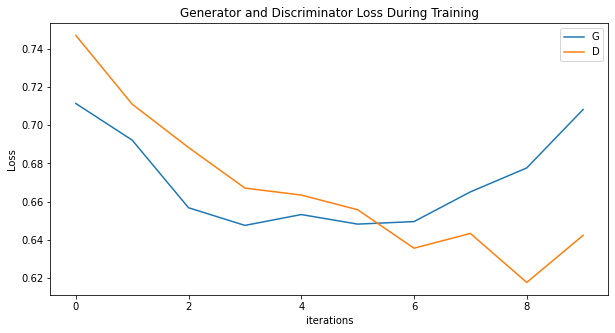

In [108]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [109]:
gan_train_auto =74.2
gan_test_auto =70.3

print('\nGAN: Accuracy on training Data: {:.3f}' .format(gan_train_auto))
print('GAN: Accuracy on test Data: {:.3f}' .format(gan_test_auto))


GAN: Accuracy on training Data: 74.200
GAN: Accuracy on test Data: 70.300


In [113]:
GetResults('GAN', gan_train_auto, gan_test_auto)

In [114]:
results

,ML Model,Train Accuracy,Test Accuracy
0,AutoEncoder,84.171,85.067
1,XGBoost,98.994,97.196


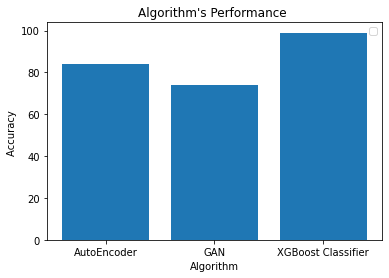

In [112]:

plt.title("Algorithm's Performance ")
x=['AutoEncoder','GAN','XGBoost Classifier']
y = [acc_train_auto*100,gan_train_auto,acc_train_xgb*100]
plt.bar(x,y)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()